In [1]:
import pandas as pd
import numpy as np
from tableone import TableOne
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
pd.set_option("display.max_columns", None)

/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


In [2]:
df_orig = pd.read_csv("./data_request_htn.csv")
df_orig.head()

/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SM_DATE,HPCID,sex,AGE,percentage_fat,Height,Weight,BMI,MVPA,rest_HR,Smoke,CRF,비만도,Muscle_mass,복부지방율,부종검사,Muscle_mass(RA),Muscle_mass(LA),Muscle_mass(BODY),Muscle_mass(RL),Muscle_mass(LL),체지방량,체수분량,제지방량,CRP,CHOLESTEROL,TG,max_heart_rate,BMI_cal,"Glucose, Fasting",ASMI,VO2max,death,delta_time,Diabetes,Hypertension,HTN_med,Hyperlipidemia,Hepatatis,ALC,HDL_C,LDL_C,MBP,SBP,DBP,MED_HYPERTENSION,MED_HYPERLIPIDEMIA,CDW_NO,ID,mean_baPWV,mean_ABI,mean_IMT,AJ_130_Score,Volume_Score
0,2015-08-03,0107034B1E4539,1,55,33.1,153.4,56.6,24.1,0,58.0,0,7.1,115.0,35.8,0.88,0.340,1.94,1.89,17.26,5.53,5.51,18.7,27.9,37.9,0.04,223.0,76.0,119.0,24.052804,90.0,6.319173,24.85,0,1415.0,0,0,0,1,0,0,60.0,156.0,80.0,104.0,64.0,False,False,F7A27BBECBB1,F7A27BBECBB1,1295.0,1.155,0.60,0.0,NaN
1,2012-11-08,01070555203C39,0,29,22.3,169.5,67.8,23.6,0,64.0,0,11.4,107.0,49.8,0.86,0.314,2.86,2.74,23.58,8.40,8.21,15.1,38.5,52.7,NaN,274.0,97.0,175.0,23.598820,97.0,7.730528,39.90,0,2413.0,0,0,0,1,1,1,67.0,197.0,92.2,118.0,75.0,False,0.0,1E9CF1F51D29,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-06-28,0107062321322E,0,36,22.4,176.1,69.4,22.4,0,66.0,1,8.3,102.0,50.9,0.87,0.339,3.09,3.02,24.71,8.45,8.31,15.5,39.7,53.9,1.63,197.0,144.0,156.0,22.379004,87.0,7.374753,29.05,0,2546.0,0,1,0,1,0,0,36.0,142.0,102.8,143.0,76.0,False,0.0,FEDD8A02E7C1,FEDD8A02E7C1,NaN,NaN,0.65,NaN,NaN
3,2012-01-11,010706444B4537,0,50,22.9,171.2,70.5,24.1,1,63.0,0,12.3,109.0,51.4,0.92,0.326,3.00,3.03,24.58,8.33,8.55,16.1,39.9,54.4,0.05,182.0,130.0,158.0,24.053684,86.0,7.816594,43.05,0,2715.0,0,1,0,0,0,0,51.0,111.0,109.4,134.0,93.0,False,0.0,02DA327D3119,02DA327D3119,NaN,NaN,0.55,NaN,NaN
4,2011-06-15,0107064D403C37,0,37,17.9,171.1,71.7,24.5,0,61.0,1,8.2,111.0,55.9,0.88,0.327,3.57,3.48,27.18,9.27,9.08,12.8,43.4,58.9,0.03,205.0,254.0,166.0,24.491712,110.0,8.676283,28.70,0,2925.0,0,1,0,0,0,1,45.0,129.0,108.0,135.0,90.0,False,0.0,3DD843D66B31,3DD843D66B31,NaN,NaN,0.50,NaN,NaN


### Select subset to use

In [3]:
df_orig['Pulse_Pressure'] = df_orig['SBP'] - df_orig['DBP'] ## Pulse Pressure -> Dereived variable
df_orig['Age^2'] = df_orig['AGE'] ** 2
#df_orig = df_orig[(df_orig['Hypertension'] != 1) | (df_orig['AJ_130_Score'] >= 0) | (df_orig['Volume_Score'] > 0)] ## Exclude Hypertension 
#df_orig = df_orig[(df_orig['AJ_130_Score'] >= 0) | (df_orig['Volume_Score'] > 0)] ## Exclude Hypertension 

df_male = df_orig[df_orig['sex'] == False].reset_index(drop=True)
df_female = df_orig[df_orig['sex'] == True].reset_index(drop=True)

/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#df_male = df_male[(df_male['mean_baPWV'] < 3000) & (df_male['mean_IMT'] < 3)]

/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Make Figure

In [5]:
df_orig.head()

/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SM_DATE,HPCID,sex,AGE,percentage_fat,Height,Weight,BMI,MVPA,rest_HR,Smoke,CRF,비만도,Muscle_mass,복부지방율,부종검사,Muscle_mass(RA),Muscle_mass(LA),Muscle_mass(BODY),Muscle_mass(RL),Muscle_mass(LL),체지방량,체수분량,제지방량,CRP,CHOLESTEROL,TG,max_heart_rate,BMI_cal,"Glucose, Fasting",ASMI,VO2max,death,delta_time,Diabetes,Hypertension,HTN_med,Hyperlipidemia,Hepatatis,ALC,HDL_C,LDL_C,MBP,SBP,DBP,MED_HYPERTENSION,MED_HYPERLIPIDEMIA,CDW_NO,ID,mean_baPWV,mean_ABI,mean_IMT,AJ_130_Score,Volume_Score,Pulse_Pressure,Age^2
0,2015-08-03,0107034B1E4539,1,55,33.1,153.4,56.6,24.1,0,58.0,0,7.1,115.0,35.8,0.88,0.340,1.94,1.89,17.26,5.53,5.51,18.7,27.9,37.9,0.04,223.0,76.0,119.0,24.052804,90.0,6.319173,24.85,0,1415.0,0,0,0,1,0,0,60.0,156.0,80.0,104.0,64.0,False,False,F7A27BBECBB1,F7A27BBECBB1,1295.0,1.155,0.60,0.0,NaN,40.0,3025
1,2012-11-08,01070555203C39,0,29,22.3,169.5,67.8,23.6,0,64.0,0,11.4,107.0,49.8,0.86,0.314,2.86,2.74,23.58,8.40,8.21,15.1,38.5,52.7,NaN,274.0,97.0,175.0,23.598820,97.0,7.730528,39.90,0,2413.0,0,0,0,1,1,1,67.0,197.0,92.2,118.0,75.0,False,0.0,1E9CF1F51D29,NaN,NaN,NaN,NaN,NaN,NaN,43.0,841
2,2012-06-28,0107062321322E,0,36,22.4,176.1,69.4,22.4,0,66.0,1,8.3,102.0,50.9,0.87,0.339,3.09,3.02,24.71,8.45,8.31,15.5,39.7,53.9,1.63,197.0,144.0,156.0,22.379004,87.0,7.374753,29.05,0,2546.0,0,1,0,1,0,0,36.0,142.0,102.8,143.0,76.0,False,0.0,FEDD8A02E7C1,FEDD8A02E7C1,NaN,NaN,0.65,NaN,NaN,67.0,1296
3,2012-01-11,010706444B4537,0,50,22.9,171.2,70.5,24.1,1,63.0,0,12.3,109.0,51.4,0.92,0.326,3.00,3.03,24.58,8.33,8.55,16.1,39.9,54.4,0.05,182.0,130.0,158.0,24.053684,86.0,7.816594,43.05,0,2715.0,0,1,0,0,0,0,51.0,111.0,109.4,134.0,93.0,False,0.0,02DA327D3119,02DA327D3119,NaN,NaN,0.55,NaN,NaN,41.0,2500
4,2011-06-15,0107064D403C37,0,37,17.9,171.1,71.7,24.5,0,61.0,1,8.2,111.0,55.9,0.88,0.327,3.57,3.48,27.18,9.27,9.08,12.8,43.4,58.9,0.03,205.0,254.0,166.0,24.491712,110.0,8.676283,28.70,0,2925.0,0,1,0,0,0,1,45.0,129.0,108.0,135.0,90.0,False,0.0,3DD843D66B31,3DD843D66B31,NaN,NaN,0.50,NaN,NaN,45.0,1369


/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


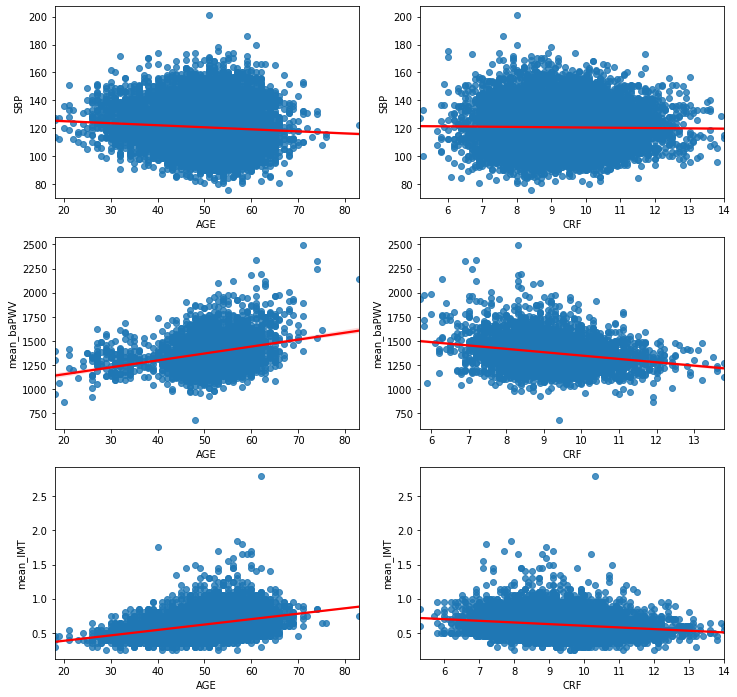

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
sns.regplot(x="AGE", y="SBP", data=df_male[df_male['SBP'].notnull()], ax=ax[0,0], line_kws={'color':'red'}, order=1)
sns.regplot(x="AGE", y="mean_baPWV", data=df_male[df_male['mean_baPWV'] < 3000], ax=ax[1,0], line_kws={'color':'red'}, order=1)
sns.regplot(x="AGE", y="mean_IMT", data=df_male[df_male['mean_IMT'] < 3], ax=ax[2,0], line_kws={'color':'red'}, order=1)

sns.regplot(x="CRF", y="SBP", data=df_male[df_male['SBP'].notnull()], ax=ax[0,1], line_kws={'color':'red'})
sns.regplot(x="CRF", y="mean_baPWV", data=df_male[df_male['mean_baPWV'] < 3000], ax=ax[1,1], line_kws={'color':'red'}, order=1)
sns.regplot(x="CRF", y="mean_IMT", data=df_male[df_male['mean_IMT'] < 3], ax=ax[2,1], line_kws={'color':'red'}, order=1)
plt.show()

/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='AGE', ylabel='SBP'>

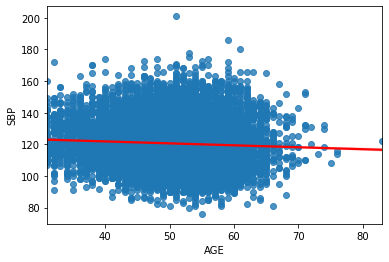

In [11]:
sns.regplot(x="AGE", y="SBP", data=df_male[df_male['AGE'] > 30], line_kws={'color':'red'}, order=1)